In [2]:
import numpy as np
import cartopy.crs
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LinearSegmentedColormap
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
colors_operability = [(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(255/256,255/256,51/256),(0,204/256,0)]
name ='my_list'
cwind ='#00a390'
cwave ='#eb7245'
cig ='#c41e79'
cwpow = '#77d3e9'
cmoperability = LinearSegmentedColormap.from_list(name, colors_operability, N=256)

In [4]:
validports = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\10validationports_d20_w138_s_2_i_005.xlsx')
labels = validports.name

In [5]:
labels = validports.name

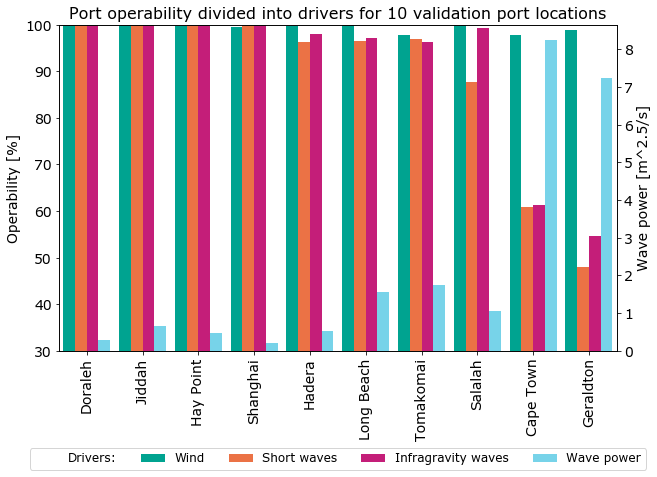

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#fig.suptitle('Port operability divided into drivers for 10 validation port locations', fontsize=16)
x = np.arange(len(labels))
width = 0.21
validports.windAvUp.plot(kind='bar', color='none', ax=ax, width=width, position=2, label='Drivers:')
validports.windAvUp.plot(kind='bar', color=cwind, ax=ax, width=width, position=2, label='Wind')
validports.swhAvUp.plot(kind='bar', color=cwave, ax=ax, width=width, position=1, label='Short waves')
validports.igAvUp.plot(kind='bar', color=cig, ax=ax, width=width, position=0, label='Infragravity waves')
validports.wavePo.plot(kind='bar', color=cwpow, ax=ax, width=width, position=-1, label='Wave power')
validports.wavePo.plot(kind='bar', color=cwpow, ax=ax2, width=width, position=-1, label='Wave power')

ax.set_xticklabels(labels, rotation=90, size=14)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
ax.set_ylabel('Operability [%]', size=14)
ax.set_xlim(-0.5,9.5)
ax.set_ylim(30,100)
ax.set_title('Port operability divided into drivers for 10 validation port locations', fontsize=16)
ax2.set_ylabel('Wave power [m^2.5/s]', size=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.28), ncol=5, fontsize=12)
#plt.savefig('port_operability_10validationports_drivers_wavepower.png', dpi=300, bbox_inches='tight');

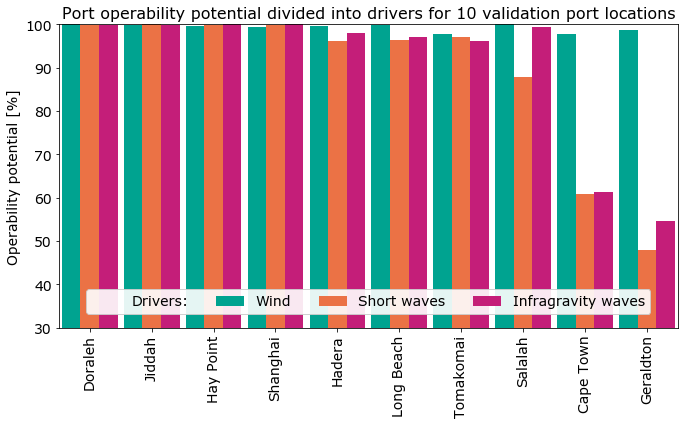

In [12]:
Wind = round(validports.windAvUp,1)
Short_waves = round(validports.swhAvUp,1)
Infragravity_waves = round(validports.igAvUp,1)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, Wind, width, color='none', label='Drivers:')
ax.bar(x - width, Wind, width, label='Wind', color=cwind)
ax.bar(x, Short_waves, width, label='Short waves', color=cwave)
ax.bar(x + width, Infragravity_waves, width, label='Infragravity waves', color=cig)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Operability potential [%]', size=14)
ax.set_title('Port operability potential divided into drivers for 10 validation port locations', fontsize=16)
ax.set_ylim(30,100)
ax.set_xlim(-0.5,9.5)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, size=14)
ax.tick_params(axis='both', labelsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=4, fontsize=14, framealpha=0.9)

fig.tight_layout()
plt.savefig('availability_10validationports_drivers3.png', dpi=300, bbox_inches='tight');

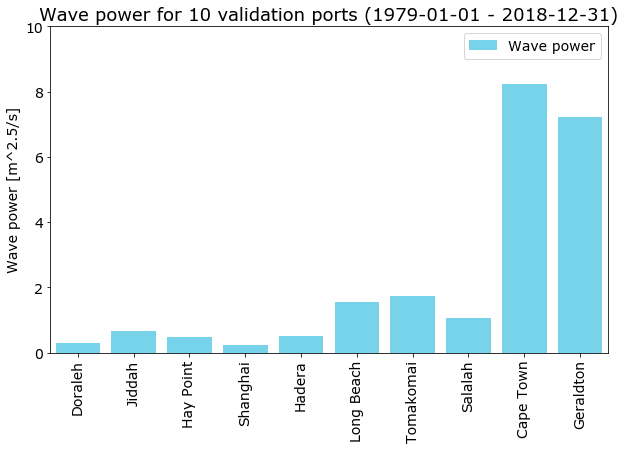

In [11]:
width = 0.8
x = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,validports.wavePo,width, label='Wave power', color=cwpow)
ax.set_xlim(-0.5,9.5)
ax.set_ylim(0,10)
ax.set_title('Wave power for 10 validation ports (1979-01-01 - 2018-12-31)', fontsize=18)
ax.set_ylabel('Wave power [m^2.5/s]', size=14)
ax.set_xticklabels(labels, rotation=90, size=14)
ax.set_xticks(np.arange(0, 10, step=1));
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc='upper right', fontsize=14)

plt.savefig('wave_power_10_validation_ports2.png', dpi=300, bbox_inches='tight');

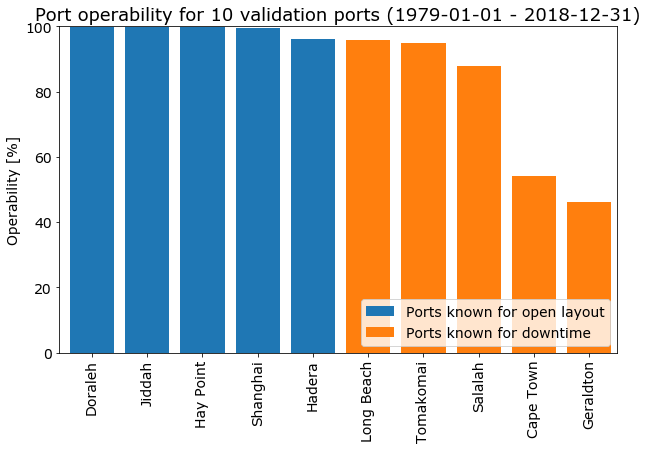

In [75]:
width = 0.8  # the width of the bars
labels = ports6.name.loc[:]
ports6.operability
x1 = np.arange(1,6,1)
x2 = np.arange(6,11,1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x1,ports6.operability.iloc[:5],width, label='Ports known for open layout')
ax.bar(x2,ports6.operability.iloc[5:],width, label='Ports known for downtime')
ax.set_xlim(0.4,10.5)
ax.set_ylim(0,100)
ax.set_title('Port operability for 10 validation ports (1979-01-01 - 2018-12-31)', fontsize=18)
ax.set_ylabel('Operability [%]', size=14)
ax.set_xticklabels(labels, rotation=90, size=14)
ax.set_xticks(np.arange(1, 11, step=1));
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc='lower right', fontsize=14)

plt.savefig('operability_bar_chart_10validation_ports.png', dpi=300, bbox_inches='tight');

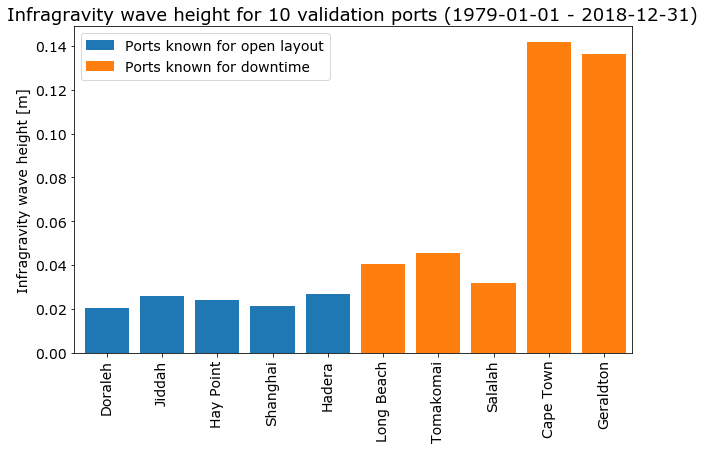

In [78]:
width = 0.8  # the width of the bars
labels = ports6.name.loc[:]
ports6.operability
x1 = np.arange(1,6,1)
x2 = np.arange(6,11,1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x1,ports6.ig95.iloc[:5],width, label='Ports known for open layout')
ax.bar(x2,ports6.ig95.iloc[5:],width, label='Ports known for downtime')
ax.set_xlim(0.4,10.5)
#ax.set_ylim(0,100)
ax.set_title('Infragravity wave height for 10 validation ports (1979-01-01 - 2018-12-31)', fontsize=18)
ax.set_ylabel('Infragravity wave height [m]', size=14)
ax.set_xticklabels(labels, rotation=90, size=14)
ax.set_xticks(np.arange(1, 11, step=1));
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc='upper left', fontsize=14)

plt.savefig('igwaves95_bar_chart_10validation_ports.png', dpi=300, bbox_inches='tight');

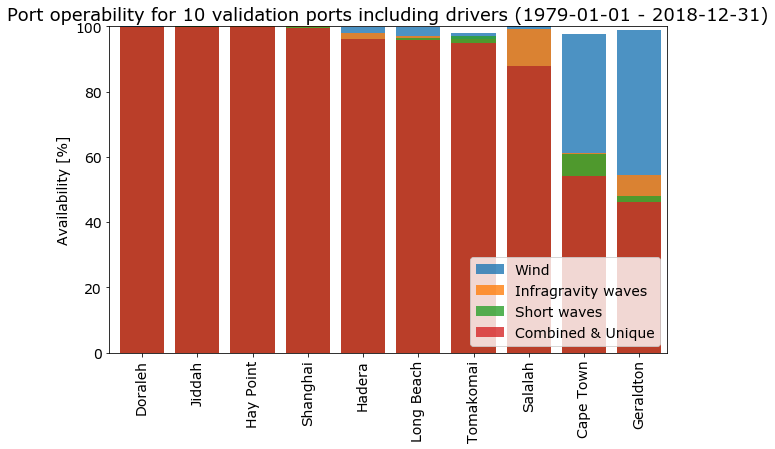

In [64]:
width = 0.8  # the width of the bars
opacity = 0.8
labels = ports6.name
ports6.operability
x = np.arange(1,11,1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,ports6.windAvUp,width, alpha=opacity, label='Wind')
ax.bar(x,ports6.igAvUp,width, alpha=opacity, label='Infragravity waves')
ax.bar(x,ports6.swhAvUp,width, alpha=opacity, label='Short waves')
ax.bar(x,ports6.operability,width, alpha=opacity, label='Combined & Unique')
ax.set_xlim(0.4,10.5)
ax.set_ylim(0,100)
ax.set_title('Port operability for 10 validation ports including drivers (1979-01-01 - 2018-12-31)', fontsize=18)
ax.set_ylabel('Availability [%]', size=14)
ax.set_xticklabels(labels, rotation=90, size=14)
ax.set_xticks(np.arange(1, 11, step=1));
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc='lower right', fontsize=14)

#plt.savefig('operability_bar_chart_drivers_103ports.png', dpi=300, bbox_inches='tight');

In [ ]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(validports['lon'],validports['lat'], c=validports['operability'], s=75, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(-174, -60, 'Threshold criteria \nWind speed: 13.8 [m/s] \nWave height: 2.0 [m] \nInfragravity wave height: 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Port operability map for 10 validation ports (combined & unique) (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('port_operability_map_for 10validationports_combined_uniqye_mediumthresholds.png', dpi=300, bbox_inches='tight');